# Data importation, merging, and cleaning

In [1]:
#Enabling multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Importing the relevant libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import shapiro
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

**Importing the relevant datasets used for analysis**

In [3]:
auth_user = pd.read_csv('auth_user.csv')
discover_genres = pd.read_csv('discover_genres.csv')
message_usermessagesettings = pd.read_csv('message_usermessagesettings.csv')
studio_song = pd.read_csv('studio_song.csv')
studio_song_tags = pd.read_csv('studio_song_tags.csv')
users_registrationcountry = pd.read_csv('users_registrationcountry.csv')
users_userclassifications = pd.read_csv('users_userclassifications.csv')
users_userprofile = pd.read_csv('users_userprofile.csv')
users_userprofile_classifications = pd.read_csv('users_userprofile_classifications.csv')

/var/folders/34/r1qq3xjj39l1mlwm2grbxj_c0000gn/T/ipykernel_2861/1843106737.py:8: DtypeWarning: Columns (11,45,49,59,67) have mixed types. Specify dtype option on import or set low_memory=False.
  users_userprofile = pd.read_csv('users_userprofile.csv')


### User_userprofile dataset

**Merging the "users_userprofile" dataset and "message_usermessagesettings" dataset**

In [4]:
df1 = users_userprofile.merge(message_usermessagesettings, on='user_id')

In [5]:
df1['id_y']

0            1
1            2
2            4
3            5
4            6
         ...  
17969    18301
17970    18302
17971    18303
17972    18304
17973    18305
Name: id_y, Length: 17974, dtype: int64

In [6]:
df1.rename({'id_x': 'id'}, axis = 1, inplace = True)

**Merging "df1" dataset with "auth_user" dataset**

In [7]:
user_df = df1.merge(auth_user, how='left')
len(user_df.index)

17974

**Merging the "user_registrationcountry" dataset with "user_df" created above**

In [8]:
users_registrationcountry = users_registrationcountry.drop(columns=['image', 'continent_id','country_code','flag_image','stripe_enabled','currency_code'])
users_registrationcountry.rename({'id': 'country_id'}, axis = 1, inplace = True)
users_registrationcountry.rename({'name': 'country_name'}, axis = 1, inplace = True)

user_df = user_df.merge(users_registrationcountry, how='left')

#drop country_id
user_df = user_df.drop('country_id', axis=1)

#remove the column id and move user_id column to the first column
user_df = user_df.drop('id', axis=1)
user_id = user_df.pop('user_id') 
user_df.insert(0, 'user_id', user_id) 
len(user_df.index)


17974

In [9]:
#removing unwanted columns from user profile dataframe
user_df = user_df.drop(columns=['photo', 'cover_photo','site','phone','facebook','instagram','snapchat','bio','timestamp','timestamp_updated','strap_line','migrated','account_type_id','city_id','reward_id','rights_co_publisher_id','rights_publisher_id','rights_society_id','county_id','back_cover_image','player_extra_image','player_extra_image_2','player_extra_image_3','player_extra_image_4','player_image','real_name','twitter','dark_mode','stripe_account_id','stripe_account_status','stripe_customer_id','stripe_customer_status','stripe_state','user_has_migrated','email_token','onboarded','v2_id', 'stripe_payment_enabled', 'user_account_type', 'youtube', 'platform_stripe_customer_id', 'campaign_code_id', 'agile_id', 'rc_product', 'locked', 'chipin_plus_subscription_id', 'chipin_plus_lock_all_songs', 'soundcloud', 'platform_upgrade_expires_at', 'made_on_stripe_account', 'tiktok', 'id_y', 'created_at', 'updated_at', 'allow_direct_messages', 'show_read_receipts', 'password', 'last_login', 'first_name', 'last_name'])
print(user_df.columns.tolist())

['user_id', 'name', 'gender', 'date_of_birth', 'occupation', 'allow_collaboration', 'allow_direct_messaging', 'user_type', 'login_type', 'allow_comments', 'show_skills', 'hide_profile', 'no_likes', 'email_verified', 'signup_source', 'chipin_account_type', 'verified', 'artist_page_likes', 'song_page_likes', 'collaboration_requests', 'artist_comments', 'song_comments', 'subscription_offers', 'artist_news', 'app_updates', 'sponsored_promotions', 'support_requests', 'direct_messages', 'is_superuser', 'username', 'is_staff', 'is_active', 'date_joined', 'country_name']


**Merging "users_userprofile_classifications" and "users_userclassifications", and then with the main "user_df" dataframe**

In [10]:
users_userclassifications = users_userclassifications.drop(columns=['timestamp', 'timestamp_updated'])
users_userclassifications.rename({'id': 'userclassifications_id'}, axis = 1, inplace = True)
users_userclassifications.rename({'name': 'userclassifications_name'}, axis = 1, inplace = True)

users_userprofile_classifications = users_userprofile_classifications.drop('id', axis=1)
users_userprofile_classifications.rename({'userprofile_id': 'user_id'}, axis = 1, inplace = True)

users_userprofile_classifications = users_userprofile_classifications.merge(users_userclassifications, how='left')

In [11]:
rough_df = pd.merge(user_df, users_userprofile_classifications, on='user_id', how='left')

### Studio_song dataset

In [12]:
studio_song.rename({'id': 'song_id'}, axis = 1, inplace = True)

**Merging the "studio_song" dataset and "studio_song_tags" dataset**

In [13]:
song_df = studio_song.merge(studio_song_tags, how='left')
len(song_df.index)
print(song_df.columns)

30207

Index(['song_id', 'uuid', 'name', 'slug', 'duration', 'featured', 'cover',
       'banner_image', 'colour_scheme', 'retraks_count', 'downloads_count',
       'retrak', 'stem', 'description', 'back_cover_description', 'explicit',
       'show_collaborators', 'lyrics_allowed', 'public', 'allow_retrak',
       'allow_stem', 'deleted', 'deleted_at', 'migrated', 'created_at',
       'updated_at', 'genre_id', 'reward_id', 'sub_genre_id',
       'sub_sub_genre_id', 'user_id', 'back_cover_image', 'player_extra_image',
       'player_extra_image_2', 'player_extra_image_3', 'player_extra_image_4',
       'player_image', 'mixer_on_player', 'no_likes', 'no_plays',
       'no_retracks', 'original_creator_id', 'state', 'v2_id', 'v2_project_id',
       'uploaded', 'source', 'pan', 'volume', 'locked', 'hide_from_discover',
       'id', 'genres_id'],
      dtype='object')


In [14]:
#removing unwanted columns from studio song dataframe
song_df = song_df.drop(columns=['uuid','slug', 'duration', 'featured', 'cover', 'banner_image', 'colour_scheme', 'retraks_count', 'retrak', 'stem', 'description', 'back_cover_description', 'show_collaborators', 'lyrics_allowed', 'allow_retrak', 'allow_stem', 'deleted_at', 'migrated', 'created_at', 'updated_at', 'reward_id', 'sub_genre_id', 'sub_sub_genre_id', 'back_cover_image', 'player_extra_image', 'player_extra_image_2', 'player_extra_image_3', 'player_extra_image_4', 'player_image', 'mixer_on_player', 'no_retracks', 'original_creator_id', 'v2_id', 'v2_project_id', 'uploaded', 'genres_id','id'])
print(song_df.columns.tolist())

['song_id', 'name', 'downloads_count', 'explicit', 'public', 'deleted', 'genre_id', 'user_id', 'no_likes', 'no_plays', 'state', 'source', 'pan', 'volume', 'locked', 'hide_from_discover']


**Replacing genre_id with genre_name in the "song_df" dataset (based on discover_genres table)**

In [15]:
#dropping irrelevant columns from discover_genres table and renaming column names
discover_genres = discover_genres.drop(columns=['tag_type', 'image_active','image_inactive','created_at','updated_at','search_count','parent_id','image','banner_image'])
discover_genres.rename({'id': 'genre_id'}, axis = 1, inplace = True)
discover_genres.rename({'tag': 'genre_name'}, axis = 1, inplace = True)

#merging updated discover_genres table into final dataset
song_df = song_df.merge(discover_genres, how='left')

#drop genre_id
song_df = song_df.drop('genre_id', axis=1)

**Checking for duplicate values in song_df and user_df**

In [16]:
#checking for number of duplicate values in user profile table by user id
num_duplicates_user = user_df.duplicated(subset=['user_id']).sum()

# Print the number of duplicate rows
print(num_duplicates_user)

#checking for number of duplicate values in song table by song id
num_duplicates_songs = song_df.duplicated(subset=['song_id']).sum()

# Print the number of duplicate rows
print(num_duplicates_songs)

#dropping all duplicate values from song table
song_df = song_df.drop_duplicates()

0
973


In [17]:
print(user_df.isnull().sum())
#filling missing values on other object features
other_user_features = ['name','occupation','username','country_name']
user_df[other_user_features] = user_df[other_user_features].fillna('Unknown')

user_id                       0
name                      10950
gender                     6950
date_of_birth              8204
occupation                17764
allow_collaboration           0
allow_direct_messaging        0
user_type                  2016
login_type                    0
allow_comments                0
show_skills                   0
hide_profile                  0
no_likes                      0
email_verified                0
signup_source                 0
chipin_account_type           0
verified                      0
artist_page_likes             0
song_page_likes               0
collaboration_requests        0
artist_comments               0
song_comments                 0
subscription_offers           0
artist_news                   0
app_updates                   0
sponsored_promotions          0
support_requests              0
direct_messages               0
is_superuser                713
username                    713
is_staff                    713
is_activ

**DATA TRANSFORMATION: doing one-hot encoding to convert categorical features to binary format**

In [18]:
#One hot encoding to convert the categorical features to binary format
user_dummy_cat = user_df[['gender', 'allow_collaboration','allow_direct_messaging','user_type', 'login_type', 'allow_comments', 'show_skills', 'hide_profile', 'email_verified', 'signup_source','chipin_account_type','verified', 'artist_page_likes', 'song_page_likes', 'collaboration_requests', 'artist_comments', 'song_comments', 'subscription_offers', 'artist_news', 'app_updates', 'sponsored_promotions', 'support_requests', 'direct_messages','is_superuser', 'is_staff', 'is_active']]
user_dummy_var = pd.get_dummies(user_dummy_cat)
user_df = user_df.drop(['gender', 'allow_collaboration','allow_direct_messaging','user_type', 'login_type', 'allow_comments', 'show_skills', 'hide_profile', 'email_verified', 'signup_source','chipin_account_type','verified', 'artist_page_likes', 'song_page_likes', 'collaboration_requests', 'artist_comments', 'song_comments', 'subscription_offers', 'artist_news', 'app_updates', 'sponsored_promotions', 'support_requests', 'direct_messages','is_superuser', 'is_staff', 'is_active'], axis=1)
user_df = pd.concat([user_df, user_dummy_var], axis=1)

**Checking for null values in song_df**

In [19]:
print(song_df.isnull().sum())
#filling missing values on other object features in song table
other_song_features = ['genre_name']
song_df[other_song_features] = song_df[other_song_features].fillna('Unknown')

song_id                   0
name                      0
downloads_count           0
explicit                  0
public                    0
deleted                   0
user_id                   0
no_likes                  0
no_plays                  0
state                     0
source                    0
pan                       0
volume                    0
locked                    0
hide_from_discover        0
genre_name            27464
dtype: int64


**DATA TRANSFORMATION: doing one-hot encoding to convert categorical features to binary format**

In [20]:
#One hot encoding to convert the categorical features in song table to binary format
song_dummy_cat = song_df[['explicit','public','deleted','state','source','locked', 'hide_from_discover']]
song_dummy_var = pd.get_dummies(song_dummy_cat)
song_df = song_df.drop(['explicit','public','deleted','state','source','locked', 'hide_from_discover'], axis=1)
song_df = pd.concat([song_df, song_dummy_var], axis=1)

### **Creating the outcome variable labeled "Success"**

For further analysis using a model, the success of an artist is measured based on the number of plays they get from a song. The "song_df" dataset that contains this information has been utilised. "Success" is a binary variable that will be encoded as 1 is the artist is successful and 0 if not successful. The threshold of "no_plays" that will determine success is taken as the 75th percentile of "no_plays" variable which is 3 plays. Any song that has greater than 3 plays will be consdiered as "Success = 1".  

In [21]:
p75 = song_df["no_plays"].quantile(0.75)
print("75th percentile: ", p75)

75th percentile:  3.0


In [22]:
# Create a new column called "Success" with values of 1 or 0 based on the "no_plays" column and the threshold
song_df["Success"] = song_df["no_plays"].apply(lambda x: 1 if x >= 3 else 0)

In [23]:
count_success = (song_df["Success"] == 1).sum()
count_no_success = (song_df["Success"] == 0).sum()
print("Number of successful songs: ", count_success)
print("Number of non successful songs: ", count_no_success)

Number of successful songs:  7629
Number of non successful songs:  21605


# Exploratory Analysis

In this section, the final datasets are initaially explored to detect trends, patterns and correlations. The first area to consider is the descriptive statistics to get the overall view of the final dataset.

## Descriptive Analysis

This section relates to the initial outlook of the datasets after initial cleaning and preprocessing.

In [24]:
# Calculate the summary statistics for users dataset
user_summarystat = user_df.describe()
user_summarystat

,user_id,no_likes,gender_female,gender_male,gender_unknown,user_type_creator,user_type_discover,login_type_apple,login_type_email,login_type_facebook,...,signup_source_web,chipin_account_type_chipin,chipin_account_type_chipin_plus,chipin_account_type_not_enabled,is_superuser_False,is_superuser_True,is_staff_False,is_staff_True,is_active_False,is_active_True
count,17974.000000,17974.000000,17974.000000,17974.000000,17974.000000,17974.000000,17974.000000,17974.000000,17974.000000,17974.000000,...,17974.000000,17974.000000,17974.000000,17974.000000,17974.000000,17974.000000,17974.000000,17974.000000,17974.000000,17974.000000
mean,9329.644097,3.429287,0.195838,0.343886,0.073606,0.732558,0.155280,0.191666,0.494325,0.113219,...,0.098476,0.006176,0.006676,0.987148,0.959608,0.000723,0.959553,0.000779,0.000835,0.959497
std,5435.132198,7.750934,0.396856,0.475017,0.261136,0.442637,0.362181,0.393622,0.499982,0.316869,...,0.297965,0.078344,0.081438,0.112639,0.196882,0.026885,0.197011,0.027899,0.028877,0.197141
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4501.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,9387.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,14002.750000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,18731.000000,176.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# Summary statistics about song dataset
song_summarystat = song_df.describe()
song_summarystat

,song_id,downloads_count,user_id,no_likes,no_plays,pan,volume,state_complete,state_initial,state_work_in_progress,source_ios,source_web,Success
count,29234.000000,29234.000000,29234.000000,29234.000000,29234.000000,29234.000000,29234.000000,29234.000000,29234.000000,29234.000000,29234.000000,29234.000000,29234.000000
mean,14731.234932,1.198639,6372.463501,0.149723,8.287645,-0.000289,0.799799,0.909113,0.000547,0.090340,0.884997,0.115003,0.260963
std,8558.303637,37.218293,5385.331932,0.925613,115.928308,0.029780,0.046139,0.287454,0.023389,0.286673,0.319031,0.319031,0.439167
min,1.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7318.250000,0.000000,1706.000000,0.000000,0.000000,0.000000,0.800000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,14629.500000,0.000000,4726.000000,0.000000,0.000000,0.000000,0.800000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,22154.750000,0.000000,10578.000000,0.000000,3.000000,0.000000,0.800000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,29597.000000,4395.000000,18728.000000,45.000000,11624.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Visualisations

Several figures are plotted in this section to provide a visual representations of the variables in the relevant datasets.

### User Demographics

The distribution of the music platform's users based on gender, location and profession are visualised in this section.

### A. Gender Distribution

Out of 17,974 users, only 9,701 users specified their profile.

([<matplotlib.patches.Wedge at 0x7f980ddeb880>,
 [Text(-0.9994620722791617, 0.45942960948924916, 'Female'),
  Text(0.9994620722791618, -0.4594296094892488, 'Male')],
 [Text(-0.5451611303340882, 0.25059796881231766, '36.3%'),
  Text(0.5451611303340882, -0.2505979688123175, '63.7%')])

(-1.118164435539132,
 1.110538698166724,
 -1.1142682514931876,
 1.1006794405472946)

Text(0.5, 1.0, 'Gender Distribution of Users on the platform')

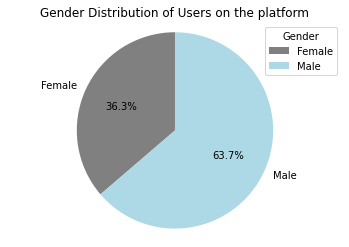

In [26]:
# Demographics based on gender
gender_distribution = user_df[['gender_female', 'gender_male']].sum()

# Pie chart customisation
labels = ['Female', 'Male']
colors = ['gray','lightblue']

# Pie - chart plot
# Plot the gender distribution
fig, ax = plt.subplots()
ax.pie(gender_distribution, labels = labels, colors = colors, autopct='%1.1f%%', startangle = 90)
ax.axis('equal')

# Title and Legend
ax.set_title('Gender Distribution of Users on the platform')
ax.legend(title = 'Gender',
         loc = 'upper right')

plt.show()

In [27]:
gender_distribution

gender_female    3520
gender_male      6181
dtype: int64

Findings: From the graph, the proportion of male users on the platform is almost double that of female users. 

### B. Occupation

<AxesSubplot:>

Text(0.5, 1.0, '15 Most Popular Professions of Users on the music platform')

Text(0.5, 0, 'Number of users')

Text(0, 0.5, 'Job type')

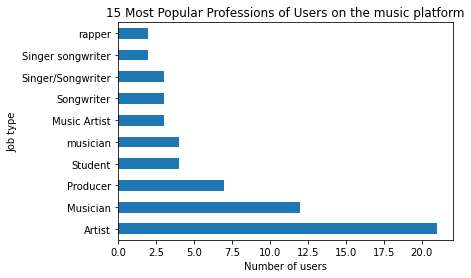

In [28]:
# Based on Occupation

# Filter out all the unknowns from the occupation column and count for each job type
filtered_df = user_df[user_df['occupation'] != 'Unknown']
job_counts = filtered_df['occupation'].value_counts()

# 15 most popular occupations
top_jobs = job_counts.head(10)

# Create a bar chart of the type proportions

top_jobs.plot(kind='barh', align='center')
plt.title('15 Most Popular Professions of Users on the music platform')
plt.xlabel('Number of users')
plt.ylabel('Job type')
plt.show()


Finding: Most users are individuals in the music industry. Does this mean there are more creators on the platform than listeners?

### User Location Distribution

In [29]:
# Based on Location
import geopandas as gpd

# Filter out all the unknowns from the location column and count for each country
filtered_location = user_df[user_df['country_name'] != 'Unknown']
filtered_location['country_name'] = filtered_location['country_name'].replace('United States','United States of America')

# Load country shapefile
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map

# Count users by country
country_counts = filtered_location['country_name'].value_counts()
country_counts

# Merge country counts with shapefile
world = world_map.merge(country_counts, left_on='name', right_index=True)
world

/var/folders/34/r1qq3xjj39l1mlwm2grbxj_c0000gn/T/ipykernel_2861/4088025635.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_location['country_name'] = filtered_location['country_name'].replace('United States','United States of America')


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


United States of America    1177
United Kingdom               976
Canada                       122
Australia                    105
India                         40
                            ... 
China                          1
Panama                         1
Greece                         1
South Korea                    1
Colombia                       1
Name: country_name, Length: 68, dtype: int64

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country_name
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",122
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1177
5,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",1
8,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",1
13,52573973.0,Africa,Kenya,KEN,95503,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",1
...,...,...,...,...,...,...,...
150,2087946.0,Europe,Slovenia,SVN,54174,"POLYGON ((13.80648 46.50931, 14.63247 46.43182...",2
151,5520314.0,Europe,Finland,FIN,269296,"POLYGON ((28.59193 69.06478, 28.44594 68.36461...",1
155,126264931.0,Asia,Japan,JPN,5081769,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",4
161,1198575.0,Asia,Cyprus,CYP,24948,"POLYGON ((32.73178 35.14003, 32.91957 35.08783...",2


In [30]:
# using folium for a more interactive map - reference
import folium

# Create a map
my_map = folium.Map()

# Add the data
folium.Choropleth(
    geo_data=world,
    data=world,
    name='choropleth',
    columns=['name', 'country_name'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name='Total Number of Users per country'
).add_to(my_map)
my_map.save('User_Locations.html')


### User Profile Classification

Users of the music platform are classified based on the roles they assume on the platform. Each user is in more than one class.

In [31]:
class_counts = rough_df['userclassifications_name'].value_counts()
class_counts

musician      4127
singer        3660
songwriter    3499
producer      1804
lyricist       369
Name: userclassifications_name, dtype: int64

<BarContainer object of 5 artists>

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Proportion')

Text(0.5, 1.0, 'User Profile Classification')

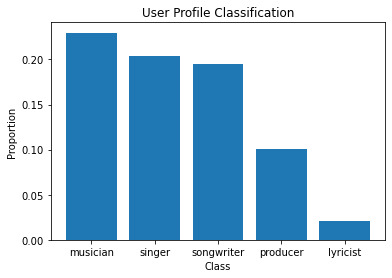

([<matplotlib.patches.Wedge at 0x7f9813ed8490>,
 [Text(0.6278748877039518, 0.9032015973141047, 'musician'),
  Text(-1.0292409953774135, 0.38815328600246485, 'singer'),
  Text(-0.283191781244268, -1.0629216410609479, 'songwriter'),
  Text(0.9119781217635875, -0.6150576439851465, 'producer'),
  Text(1.0959222617318514, -0.09462767164283353, 'lyricist')],
 [Text(0.34247721147488275, 0.4926554167167843, '30.7%'),
  Text(-0.561404179296771, 0.21171997418316263, '27.2%'),
  Text(-0.15446824431505526, -0.5797754405786988, '26.0%'),
  Text(0.49744261187104766, -0.3354859876282617, '13.4%'),
  Text(0.5977757791264643, -0.051615093623363736, '2.7%')])

Text(0.5, 1.0, 'User Profile Classification')

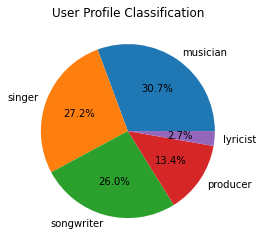

In [32]:
# Calculate the proportions for each class
total_users = rough_df['user_id'].nunique()
class_proportions = class_counts / total_users

# Create a bar chart of the class proportions
plt.bar(class_proportions.index, class_proportions.values)
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('User Profile Classification')
plt.show()

# Plot the proportions for each class group
plt.pie(class_proportions, labels = class_counts.index , autopct='%1.1f%%')
plt.title('User Profile Classification')
plt.show()

Findings - Musicians, singers and songwriters are within the same range and considered as the majority classes on the platform. However, lyricists are comparatively lacking.

# User and Song Engagement

This section reviews factors that speak to user behaviour on the platform. These factors include number of likes, plays and downloads per user and song

### A. Upload Platform and Engagement


There are two platforms that artists can use to upload their songs - IOS and web.

In [33]:
platform_count = song_df[['source_ios', 'source_web']].sum()
platform_count

source_ios    25872
source_web     3362
dtype: int64

In [34]:
# To get a merged column
sliced = song_df
sliced['upload_source'] = ''
sliced.loc[sliced['source_ios'] == 1, 'upload_source'] = 'iOS'
sliced.loc[sliced['source_web'] == 1, 'upload_source'] = 'Web'

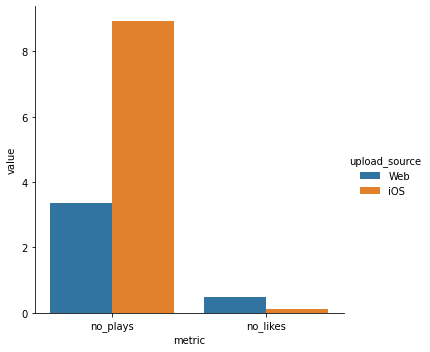

In [35]:
# Group the data by upload platform and compute the average engagement metrics
source_group = sliced.groupby('upload_source')[['no_plays', 'no_likes']].mean().reset_index()

# Melt the data to create a long format suitable for plotting
melted_data = pd.melt(source_group, id_vars=['upload_source'], var_name='metric', value_name='value')

# Create the grouped bar chart
sns.catplot(x='metric', y='value', hue='upload_source', data=melted_data, kind='bar')

Finding: Songs that were uploaded through an iOS device has way more number of plays than those uploaded through the web. This may be because more songs were uploaded using iOS than through the web.

# Top Performers based on Number of Plays

This section aims to visualize the top 10 users and genres that are the most listened to on the platform.

### Most Listened to Genres

There is a total of 158 genres identified. Among these, it is crucial to find out the ones that are most popular amongst the users based on number of plays.

In [36]:
discover_genres
song_df['genre_name']

,genre_id,genre_name
0,1,Drums
1,2,Keys
2,3,Guitar
3,4,Rock
4,5,Trance
...,...,...
153,164,Experimental
154,165,Chillout
155,166,Hip Hop
156,167,Singer-Songwriter


0        Unknown
1        Unknown
2        Unknown
3        Unknown
4        Unknown
          ...   
30202    Unknown
30203    Unknown
30204    Unknown
30205    Unknown
30206    Unknown
Name: genre_name, Length: 29234, dtype: object

,genre_name,no_plays
0,60s,20
1,80s,40
2,90s,30
3,Acoustic,13307
4,Afro beat,248
...,...,...
74,Techno,0
75,Trance,22
76,Trap,288
77,Uk garage,53


Text(0.5, 0, 'No of Plays')

Text(0, 0.5, 'Genre')

Text(0.5, 1.0, 'Top 10 Genres by Number of Plays')

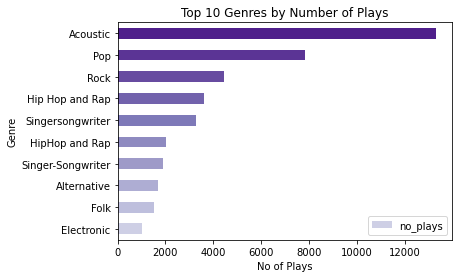

In [37]:
# Group by genre name
genre_plays = song_df.groupby('genre_name')['no_plays'].sum().reset_index()

# Remove unknowns
filtered_genres = genre_plays[genre_plays['genre_name'] != 'Unknown']
filtered_genres

# Sort to get the highest 10
genre_counts = filtered_genres.sort_values(by='no_plays', ascending = True).tail(10)

# Ploting the horizontal bar chart
cmap = plt.get_cmap('Purples')
ax = genre_counts.plot(kind='barh', x='genre_name', y='no_plays', color=cmap(np.linspace(0.3, 0.9, len('genre_name'))))

# Plot the data
ax.set_xlabel('No of Plays')
ax.set_ylabel('Genre')
ax.set_title('Top 10 Genres by Number of Plays')
plt.show()

Findings: Acoustic seems to be the most played genre on this platform. It has more than twice the number of plays as the the second highest genre - Pop.

### Most Listened to Artists

This section considers the artists that have the highest total number of plays from all songs released on the platform. 

,user_id,no_plays,name,verified
1,2,226,Anton,False
2,4,282,dusty ineman,False
3,5,328,Zayne Savall,False
4,6,76,Rachel Ayjay,False
5,7,13,Timothy Michel,False
...,...,...,...,...
8774,18248,0,Harsh,False
8777,18260,0,WordIncarnate,False
8778,18262,0,Uwasha Wa Ya,False
8896,18560,0,carson rayn,False


<BarContainer object of 10 artists>

Text(0.5, 0, 'No of Plays')

Text(0, 0.5, 'Artist')

Text(0.5, 1.0, 'Top 10 Artists by Number of Plays')

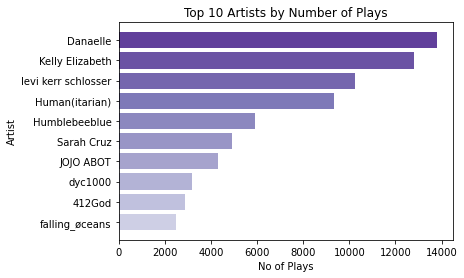

In [38]:
# Group by user_id and merge with artist name column from user dataset
artist_counts = song_df.groupby('user_id')['no_plays'].sum().reset_index()
artist_counts = pd.merge(artist_counts, user_df[['user_id','name','verified']], on = 'user_id', how = 'left')

# Remove unknowns
filtered_artists = artist_counts[artist_counts['name'] != 'Unknown']
filtered_artists

# Sort to get the highest 10
artist_counts = filtered_artists.sort_values(by='no_plays', ascending = True).tail(10)

# Defining the color map
cmap = plt.get_cmap('Purples')

# Ploting the horizontal bar chart
labels = artist_counts['name']
fig, ax = plt.subplots()
ax.barh(labels, artist_counts['no_plays'],align='center', color=cmap(np.linspace(0.3, 0.8, len(labels))))

# Plot the data
plt.xlabel('No of Plays')
plt.ylabel('Artist')
plt.title('Top 10 Artists by Number of Plays')
plt.show()


### Top Artists and Verification

This section considers the verification statis of artists that are most listened to on the music platform.

In [39]:
user_df['verified']

0        False
1        False
2        False
3        False
4        False
         ...  
17969    False
17970    False
17971    False
17972    False
17973    False
Name: verified, Length: 17974, dtype: bool

verified
False    10
Name: user_id, dtype: int64

([<matplotlib.patches.Wedge at 0x7f97f4757040>],
 [Text(-1.1, 1.3471114790620887e-16, 'False')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%')])

Text(0.5, 1.0, 'Distribution of Verified Artists')

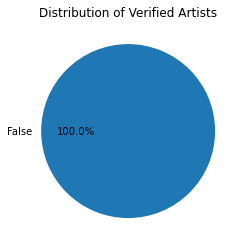

In [40]:
# group the artists by verification status and count the number of artists in each group
verification_counts = artist_counts.groupby('verified')['user_id'].count()
verification_counts

# plot the results as a pie chart
plt.pie(verification_counts, labels=['False'], autopct='%1.1f%%')
plt.title('Distribution of Verified Artists')
plt.show()


In [41]:
# Percentage of users that are verified
totalverification_counts = user_df.groupby('verified')['user_id'].count()
totalverification_counts

verified
False    17960
True        14
Name: user_id, dtype: int64

Findings: All the top artistes on the platform are not verified. There is only 1% of verified users on the platform.

## Top Artists User Classification

This section aims to disclose what classes the most played artists on the platform belong to.

In [42]:
# Merge user classification daaset with most played
top_class = pd.merge(artist_counts, rough_df[['user_id','userclassifications_name']], on = 'user_id', how = 'left')
top_class.head()

,user_id,no_plays,name,verified,userclassifications_name
0,247,2491,falling_øceans,False,songwriter
1,247,2491,falling_øceans,False,musician
2,247,2491,falling_øceans,False,singer
3,247,2491,falling_øceans,False,lyricist
4,247,2491,falling_øceans,False,producer


/var/folders/34/r1qq3xjj39l1mlwm2grbxj_c0000gn/T/ipykernel_2861/809851447.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_counts = group_counts.append({'class_group': group_name, 'count': group_count}, ignore_index=True)
/var/folders/34/r1qq3xjj39l1mlwm2grbxj_c0000gn/T/ipykernel_2861/809851447.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_counts = group_counts.append({'class_group': group_name, 'count': group_count}, ignore_index=True)
/var/folders/34/r1qq3xjj39l1mlwm2grbxj_c0000gn/T/ipykernel_2861/809851447.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_counts = group_counts.append({'class_group': group_name, 'count': group_count}, ignore_index=True)
/var/folders/34/r1qq3xjj39l1mlwm2grbx

([<matplotlib.patches.Wedge at 0x7f97f4efadf0>,
 [Text(0.823361820361495, 0.7294349270298247, 'singer'),
  Text(-0.8233617862141807, 0.7294349655741725, 'musician'),
  Text(-0.5111956435741012, -0.9740015472220055, 'writer_lyricist'),
  Text(0.9052820994707913, -0.6248714430807002, 'producer')],
 [Text(0.4491064474699063, 0.3978735965617225, '23.1%'),
  Text(-0.4491064288440985, 0.3978736175859122, '30.8%'),
  Text(-0.2788339874040552, -0.5312735712120029, '26.9%'),
  Text(0.49379023607497696, -0.34083896895310917, '19.2%')])

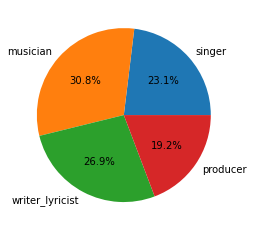

In [43]:
# Define the groups of classes
class_groups = {
    'singer': ['singer'],
    'musician': ['musician'],
    'writer_lyricist': ['songwriter', 'lyricist'],
    'producer' : ['producer']
}

# Create a new DataFrame with the class groups and the number of users in each group
group_counts = pd.DataFrame(columns=['class_group', 'count'])
for group_name, group_classes in class_groups.items():
    group_count = top_class[top_class['userclassifications_name'].isin(group_classes)].groupby('user_id').size().shape[0]
    group_counts = group_counts.append({'class_group': group_name, 'count': group_count}, ignore_index=True)

# Calculate the proportions for each class group
total_users = top_class['user_id'].nunique()
group_counts['proportion'] = group_counts['count'] / total_users

# Plot the proportions for each class group
plt.pie(group_counts['proportion'], labels=group_counts['class_group'], autopct='%1.1f%%')
plt.show()

Findings: Most played artists on the platform seems to be almost equally distributed between all the classes.

# Model selection and implementation

In [44]:
song_df.dtypes

song_id                     int64
name                       object
downloads_count             int64
user_id                     int64
no_likes                    int64
no_plays                    int64
pan                       float64
volume                    float64
genre_name                 object
explicit                     bool
public                       bool
deleted                      bool
locked                       bool
hide_from_discover           bool
state_complete              uint8
state_initial               uint8
state_work_in_progress      uint8
source_ios                  uint8
source_web                  uint8
Success                     int64
upload_source              object
dtype: object

Changing the boolean variables to 0 and 1 values, where 0 represents "False" and 1 represents "True" for explicit, public, deleted, locked, hide_from_discover

In [45]:
#Convert boolean variables to 0 and 1 values
song_df['explicit'] = song_df['explicit'].astype(int)
song_df['public'] = song_df['public'].astype(int)
song_df['deleted'] = song_df['deleted'].astype(int)
song_df['locked'] = song_df['locked'].astype(int)
song_df['hide_from_discover'] = song_df['hide_from_discover'].astype(int)

In [46]:
song_df.dtypes

song_id                     int64
name                       object
downloads_count             int64
user_id                     int64
no_likes                    int64
no_plays                    int64
pan                       float64
volume                    float64
genre_name                 object
explicit                    int64
public                      int64
deleted                     int64
locked                      int64
hide_from_discover          int64
state_complete              uint8
state_initial               uint8
state_work_in_progress      uint8
source_ios                  uint8
source_web                  uint8
Success                     int64
upload_source              object
dtype: object

**DATA NORMALIZATION: Feature scaling to convert all numerical columns to similar range** 

Determining what variables to scale using Shapiro-Wilk test

In [47]:
#normal distribution test for no_likes in song_df table
#if pvalue is greater than 0.05, no_likes is normally distributed
stat, p = shapiro(song_df['no_likes'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
 print('Fail to reject H0, hence data is normally distributed')
else:
 print('Reject H0, hence data is not normally distributed')

Statistics=0.148, p=0.000
Reject H0, hence data is not normally distributed


/Users/aparnabimal/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [48]:
#normal distribution test for downloads_count in song_df table
#if pvalue is greater than 0.05, downloads_count is normally distributed
stat, p = shapiro(song_df['downloads_count'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
 print('Fail to reject H0, hence data is normally distributed')
else:
 print('Reject H0, hence data is not normally distributed')

Statistics=0.010, p=0.000
Reject H0, hence data is not normally distributed


Scaling the necessary variables i.e., "downloads_count" and "no_likes" in "song_df" using StandardScalar

In [49]:
#Separate the outcome variable from the predictor variables
X1 = song_df.drop(['Success', 'song_id', 'name', 'user_id', 'no_plays', 'pan', 'volume', 'genre_name', 'source_ios', 'source_web','upload_source'], axis=1)
y1 = song_df['Success']

#Create an instance of the StandardScaler object
scaler = StandardScaler()

#Fit the scaler to the predictor variables
scaler.fit(X1[['downloads_count', 'no_likes']])

#Transform the predictor variables using the scaler
X1[['downloads_count', 'no_likes']] = scaler.transform(X1[['downloads_count', 'no_likes']])

StandardScaler()

**Splitting the dataset into train and test set**

In [50]:
#Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

## Random Forest Model

In [51]:
#Create a random forest classifier object
rfc = RandomForestClassifier(random_state=42)

#Fit the random forest model to the oversampled training data
rfc.fit(X_train1, y_train1)

#Use the trained model to make predictions on the test data
y_pred = rfc.predict(X_test1)

#Compute the evaluation metrics for the model
accuracy = accuracy_score(y_test1, y_pred)
precision = precision_score(y_test1, y_pred)
recall = recall_score(y_test1, y_pred)
f1 = f1_score(y_test1, y_pred)
confusion_matrix = confusion_matrix(y_test1, y_pred)

#Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Confusion matrix: \n", confusion_matrix)
print("Classification report: \n",classification_report(y_test1, y_pred))

RandomForestClassifier(random_state=42)

Accuracy:  0.8282977995667541
Precision:  0.7535031847133759
Recall:  0.5139009556907037
F1-score:  0.6110537190082646
Confusion matrix: 
 [[6082  387]
 [1119 1183]]
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6469
           1       0.75      0.51      0.61      2302

    accuracy                           0.83      8771
   macro avg       0.80      0.73      0.75      8771
weighted avg       0.82      0.83      0.82      8771



**Model tuning to improve performance**

1. Tuning hyperparameters using GridSearchCV

In [52]:
#Create a dictionary of hyperparameters and their values to test
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap' : [True, False]
}

#Create a GridSearchCV object with the random forest classifier and the hyperparameter grid
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')

#Fit the GridSearchCV object to the training data
grid_search.fit(X_train1, y_train1)

#Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

Best hyperparameters:  {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best score:  0.6095752583954962


Given that GridSearchCV has now provided us with the best hyperparameters to use, the RandomForestClassifier() model is adjusted accordingly

In [53]:
#Use the best hyperparameters to create a new random forest classifier object
rfc_tuned = RandomForestClassifier(bootstrap=True, max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=42)

#Fit the tuned random forest model to the full training data
rfc_tuned.fit(X_train1, y_train1)

#Use the trained model to make predictions on the test data
y_pred = rfc_tuned.predict(X_test1)

#Compute the evaluation metrics for the model
accuracy = accuracy_score(y_test1, y_pred)
precision = precision_score(y_test1, y_pred)
recall = recall_score(y_test1, y_pred)
f1 = f1_score(y_test1, y_pred)
conf_matrix = sk_confusion_matrix(y_test1, y_pred)

#Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Confusion matrix: \n", confusion_matrix)
print("Classification report: \n",classification_report(y_test1, y_pred))

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=10, random_state=42)

Accuracy:  0.8278417512256299
Precision:  0.751269035532995
Recall:  0.5143353605560382
F1-score:  0.6106240330067044
Confusion matrix: 
 [[6082  387]
 [1119 1183]]
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6469
           1       0.75      0.51      0.61      2302

    accuracy                           0.83      8771
   macro avg       0.80      0.73      0.75      8771
weighted avg       0.82      0.83      0.82      8771



**NOTE**: Using GridSearchCV didn't improve the performance of the model, we look at feature selection

In [54]:
from sklearn.feature_selection import SelectFromModel

#Create a random forest classifier object
rfc_tuned = RandomForestClassifier(bootstrap=True, max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=42)

#Fit the random forest model to the oversampled training data
rfc_tuned.fit(X_train1, y_train1)

#Use feature importance attribute to select the most important features
sel = SelectFromModel(rfc_tuned)

#Transform the dataset to include only the most important features
X_train1_selected = sel.fit_transform(X_train1, y_train1)
X_test1_selected = sel.transform(X_test1)

#Retrain the model on the selected features
rfc_tuned.fit(X_train1_selected, y_train1)

#Use the trained model to make predictions on the test data
y_pred = rfc_tuned.predict(X_test1_selected)

#Compute the evaluation metrics for the model
accuracy = accuracy_score(y_test1, y_pred)
precision = precision_score(y_test1, y_pred)
recall = recall_score(y_test1, y_pred)
f1 = f1_score(y_test1, y_pred)
conf_matrix = sk_confusion_matrix(y_test1, y_pred)

#Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Confusion matrix: \n", conf_matrix)
print("Classification report: \n",classification_report(y_test1, y_pred))

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=10, random_state=42)

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=10, random_state=42)

Accuracy:  0.8273857028845057
Precision:  0.7519181585677749
Recall:  0.5108601216333623
F1-score:  0.6083807553026384
Confusion matrix: 
 [[6081  388]
 [1126 1176]]
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6469
           1       0.75      0.51      0.61      2302

    accuracy                           0.83      8771
   macro avg       0.80      0.73      0.75      8771
weighted avg       0.82      0.83      0.82      8771



Another method to improve model performance is PCA for feature engineering

In [55]:
#Create a PCA object with the desired number of components
pca = PCA(n_components=10)

#Fit the PCA object to the training data
X_train_pca = pca.fit_transform(X_train1)

#Transform the test data using the trained PCA object
X_test_pca = pca.transform(X_test1)

#Train a new model on the transformed data
model = RandomForestClassifier(bootstrap=True, max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=42)
model.fit(X_train_pca, y_train1)

#Evaluate the model on the transformed test data
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test1, y_pred)
precision = precision_score(y_test1, y_pred)
recall = recall_score(y_test1, y_pred)
f1 = f1_score(y_test1, y_pred)
conf_matrix = sk_confusion_matrix(y_test1, y_pred)

#Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Confusion matrix: \n", conf_matrix)
print("Classification report: \n",classification_report(y_test1, y_pred))

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=10, random_state=42)

Accuracy:  0.8278417512256299
Precision:  0.751269035532995
Recall:  0.5143353605560382
F1-score:  0.6106240330067044
Confusion matrix: 
 [[6077  392]
 [1118 1184]]
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6469
           1       0.75      0.51      0.61      2302

    accuracy                           0.83      8771
   macro avg       0.80      0.73      0.75      8771
weighted avg       0.82      0.83      0.82      8771



For the PCA model the optimal number of components has to be used for PCA. This is done by plotting the cumilative explained variance ratio for different number of components and choose the number of components at the "elbow" of curve. 

Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Cumulative explained variance')

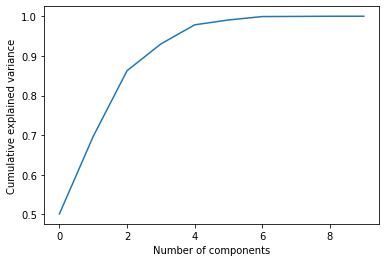

In [56]:
#Fit PCA to the training data
pca = PCA().fit(X_train1)

#Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

From the elbow graph, we can choose 5 components and use PCA again


In [57]:
#Create a PCA object with the desired number of components
pca = PCA(n_components=5)

#Fit the PCA object to the training data
X_train_pca = pca.fit_transform(X_train1)

#Transform the test data using the trained PCA object
X_test_pca = pca.transform(X_test1)

#Train a new model on the transformed data
model = RandomForestClassifier(bootstrap=True, max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=42)
model.fit(X_train_pca, y_train1)

#Evaluate the model on the transformed test data
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test1, y_pred)
precision = precision_score(y_test1, y_pred)
recall = recall_score(y_test1, y_pred)
f1 = f1_score(y_test1, y_pred)
conf_matrix = sk_confusion_matrix(y_test1, y_pred)

#Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Confusion matrix: \n", conf_matrix)
print("Classification report: \n",classification_report(y_test1, y_pred))

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=10, random_state=42)

Accuracy:  0.8279557633109109
Precision:  0.75142675967026
Recall:  0.5147697654213728
F1-score:  0.6109822119102861
Confusion matrix: 
 [[6077  392]
 [1117 1185]]
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6469
           1       0.75      0.51      0.61      2302

    accuracy                           0.83      8771
   macro avg       0.80      0.73      0.75      8771
weighted avg       0.82      0.83      0.82      8771



In [58]:
#Initializing Random Forest classifier
rf = RandomForestClassifier(bootstrap=True, max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=10, random_state=42)

#Initializing RFE with random forest model and no of features selected
rfe = RFE(rf, n_features_to_select=5)

#Fitting model with training data
rfe.fit(X_train1, y_train1)

#Print the ranking of each feature, with the highest ranked feature being 1
print(rfe.ranking_)

#Making predictions for Success
y_pred = rfe.predict(X_test1)

#Evaluating the model
print('Accuracy:', accuracy_score(y_test1, y_pred))
print("Precision: ", precision_score(y_test1, y_pred))
print("Recall: ", recall_score(y_test1, y_pred))
print("F1-score: ", f1_score(y_test1, y_pred))
print("Confusion matrix: \n", sk_confusion_matrix(y_test1, y_pred))
print("Classification report: \n",classification_report(y_test1, y_pred))

RFE(estimator=RandomForestClassifier(max_depth=15, min_samples_leaf=4,
                                     min_samples_split=10, n_estimators=10,
                                     random_state=42),
    n_features_to_select=5)

[1 1 4 1 1 3 5 1 6 2]
Accuracy: 0.8272716907992247
Precision:  0.7517594369801663
Recall:  0.5104257167680278
F1-score:  0.6080206985769728
Confusion matrix: 
 [[6081  388]
 [1127 1175]]
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6469
           1       0.75      0.51      0.61      2302

    accuracy                           0.83      8771
   macro avg       0.80      0.73      0.75      8771
weighted avg       0.82      0.83      0.82      8771



## Logistic Regression

Running Logistic Regression model with no fine tuning

In [59]:
#Logistic regression model
logreg = LogisticRegression()

#Fitting model with training data
logreg.fit(X_train1, y_train1)

#Making predictions for Success
lr_y_pred = logreg.predict(X_test1)

#Evaluating the model
print('Accuracy:', accuracy_score(y_test1, lr_y_pred))
print("Precision: ", precision_score(y_test1, lr_y_pred))
print("Recall: ", recall_score(y_test1, lr_y_pred))
print("F1-score: ", f1_score(y_test1, lr_y_pred))
print("Confusion matrix: \n", sk_confusion_matrix(y_test1, lr_y_pred))
print("Classification report: \n",classification_report(y_test1, y_pred))

LogisticRegression()

Accuracy: 0.796602439858625
Precision:  0.7943181818181818
Recall:  0.30364900086880975
F1-score:  0.43934632306725335
Confusion matrix: 
 [[6288  181]
 [1603  699]]
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6469
           1       0.75      0.51      0.61      2302

    accuracy                           0.83      8771
   macro avg       0.80      0.73      0.75      8771
weighted avg       0.82      0.83      0.82      8771



From above results, it is visible that there are significantly more samples in the negative class than in the positive class hence leading to class imbalance. To resolve the class imbalance issue, weights are assigned to each class to maintain balance.

In [60]:
from sklearn.utils.class_weight import compute_class_weight

#Computing class weights to balance classes
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y1)

#Initialisaing logistic regression model with new class weights
lr = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})

#Fitting model with training data
lr.fit(X_train1, y_train1)

#Making predictions for Success
y_pred = lr.predict(X_test1)

#Evaluating the model
print('Accuracy:', accuracy_score(y_test1, y_pred))
print("Precision: ", precision_score(y_test1, y_pred))
print("Recall: ", recall_score(y_test1, y_pred))
print("F1-score: ", f1_score(y_test1, lr_y_pred))
print("Confusion matrix: \n", sk_confusion_matrix(y_test1, y_pred))
print("Classification report: \n",classification_report(y_test1, y_pred))


/Users/aparnabimal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.6765563526961351, 1: 1.9159785030803513})

Accuracy: 0.6191996351613271
Precision:  0.4066546762589928
Recall:  0.9821894005212859
F1-score:  0.43934632306725335
Confusion matrix: 
 [[3170 3299]
 [  41 2261]]
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.49      0.65      6469
           1       0.41      0.98      0.58      2302

    accuracy                           0.62      8771
   macro avg       0.70      0.74      0.62      8771
weighted avg       0.83      0.62      0.63      8771



In [61]:
import collections
#Counting and displaying unique values in success column
counts = collections.Counter(y1)
for value, count in counts.items():
    print(f"{value}: {count}")

1: 7629
0: 21605


In [62]:
#Computing class weights to balance classes
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y1)

class_w = {0: 0.677, 1: 1.916}

#Initialising logistic regression model with class weights
lr = LogisticRegression(class_weight=class_w)

#Fitting model with training data
lr.fit(X_train1, y_train1)

#Making predictions for Success
y_pred = lr.predict(X_test1)

#Evaluating the model
print('Accuracy:', accuracy_score(y_test1, y_pred))
print("Precision: ", precision_score(y_test1, y_pred))
print("Recall: ", recall_score(y_test1, y_pred))
print("F1-score: ", f1_score(y_test1, y_pred))
print("Confusion matrix: \n", sk_confusion_matrix(y_test1, y_pred))
print("Classification report: \n",classification_report(y_test1, y_pred))

/Users/aparnabimal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.677, 1: 1.916})

Accuracy: 0.6191996351613271
Precision:  0.4066546762589928
Recall:  0.9821894005212859
F1-score:  0.5751717120325617
Confusion matrix: 
 [[3170 3299]
 [  41 2261]]
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.49      0.65      6469
           1       0.41      0.98      0.58      2302

    accuracy                           0.62      8771
   macro avg       0.70      0.74      0.62      8771
weighted avg       0.83      0.62      0.63      8771



PCA to reduce the dimensionality of the training data and then apply logistic regression model with hyperparameter tuning(via GridSearch) to make predictions.

PCA()

Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Cumulative explained variance ratio')

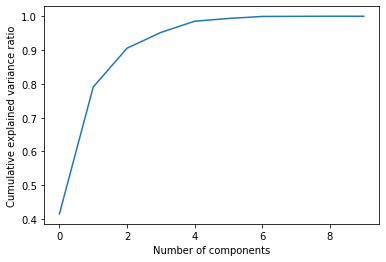

Number of components selected:  4


In [63]:
#Determining number of components for PCA
pca = PCA()
pca.fit(X1)

#Plot cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()


cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print("Number of components selected: ", n_components)

In [64]:
#PCA technique to reduce dimensionality
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train1)
X_test_pca = pca.transform(X_test1)

#Computing class weights to balance classes
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y1)

#Initialisaing logistic regression model with new class weights
model = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]})

#Parameter grid initialisation for GridSearch
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'penalty': ['l2']}

#Initialising GridSearch
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')

#Fitting model with training data
grid_search.fit(X_train_pca, y_train1)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

#Making predictions for Success
y_pred = grid_search.predict(X_test_pca)

#Evaluating the model
print('Accuracy:', accuracy_score(y_test1, y_pred))
print("Precision: ", precision_score(y_test1, y_pred))
print("Recall: ", recall_score(y_test1, y_pred))
print("F1-score: ", f1_score(y_test1, y_pred))
print("Confusion matrix: \n", sk_confusion_matrix(y_test1, y_pred))
print("Classification report: \n",classification_report(y_test1, y_pred))

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0: 0.6765563526961351,
                                                        1: 1.9159785030803513}),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']},
             scoring='accuracy')

Best parameters:  {'C': 100, 'penalty': 'l2'}
Best score:  0.6242000205868494
Accuracy: 0.6203397560141375
Precision:  0.40613586559532505
Recall:  0.9661164205039097
F1-score:  0.5718693751607097
Confusion matrix: 
 [[3217 3252]
 [  78 2224]]
Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.50      0.66      6469
           1       0.41      0.97      0.57      2302

    accuracy                           0.62      8771
   macro avg       0.69      0.73      0.62      8771
weighted avg       0.83      0.62      0.64      8771



Using bagging classifier to reduce overfitting and improve generalization performance.

In [65]:
from sklearn.ensemble import BaggingClassifier

#Initializing logistic regression classifier
log_reg = LogisticRegression()

#Initializing the bagging classifier
bagging_clf = BaggingClassifier(base_estimator=log_reg, n_estimators=50)

#Fitting model with training data
bagging_clf.fit(X_train1, y_train1)

#Making predictions for Success
y_pred = bagging_clf.predict(X_test1)

#Evaluating the model
print('Accuracy:', accuracy_score(y_test1, y_pred))
print("Precision: ", precision_score(y_test1, y_pred))
print("Recall: ", recall_score(y_test1, y_pred))
print("F1-score: ", f1_score(y_test1, y_pred))
print("Confusion matrix: \n", sk_confusion_matrix(y_test1, y_pred))
print("Classification report: \n",classification_report(y_test1, y_pred))

/Users/aparnabimal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aparnabimal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50)

Accuracy: 0.796602439858625
Precision:  0.7943181818181818
Recall:  0.30364900086880975
F1-score:  0.43934632306725335
Confusion matrix: 
 [[6288  181]
 [1603  699]]
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      6469
           1       0.79      0.30      0.44      2302

    accuracy                           0.80      8771
   macro avg       0.80      0.64      0.66      8771
weighted avg       0.80      0.80      0.76      8771



Using RFE for feature selection and then fitting into logistic regression model

In [66]:
#Initializing logistic regression model
lr = LogisticRegression()

#Initializing RFE with logistic regression model and no of features selected
rfe = RFE(lr, n_features_to_select=5)

#Fitting model with training data
rfe.fit(X_train1, y_train1)

#Print the ranking of each feature, with the highest ranked feature being 1
print(rfe.ranking_)

#Making predictions for Success
y_pred = rfe.predict(X_test1)

#Evaluating the model
print('Accuracy:', accuracy_score(y_test1, y_pred))
print("Precision: ", precision_score(y_test1, y_pred))
print("Recall: ", recall_score(y_test1, y_pred))
print("F1-score: ", f1_score(y_test1, y_pred))
print("Confusion matrix: \n", sk_confusion_matrix(y_test1, y_pred))
print("Classification report: \n",classification_report(y_test1, y_pred))

RFE(estimator=LogisticRegression(), n_features_to_select=5)

[1 1 2 1 3 4 1 1 6 5]
Accuracy: 0.7964884277733439
Precision:  0.7914317925591883
Recall:  0.3049522154648132
F1-score:  0.4402634054562559
Confusion matrix: 
 [[6284  185]
 [1600  702]]
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      6469
           1       0.79      0.30      0.44      2302

    accuracy                           0.80      8771
   macro avg       0.79      0.64      0.66      8771
weighted avg       0.80      0.80      0.76      8771



Using SMOTE for feature selection and then fitting into logistic regression model

In [67]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train1, y_train1)

#Fitting model with resampled data
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

#Making predictions for Success
y_pred = logreg.predict(X_test1)

#Evaluating the model
accuracy = accuracy_score(y_test1, y_pred)
precision = precision_score(y_test1, y_pred)
recall = recall_score(y_test1, y_pred)
f1 = f1_score(y_test1, y_pred)
conf_matrix = sk_confusion_matrix(y_test1, y_pred)
print('Accuracy:', accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Confusion matrix: \n", conf_matrix)

/Users/aparnabimal/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.6191996351613271
Precision:  0.4066546762589928
Recall:  0.9821894005212859
F1-score:  0.5751717120325617
Confusion matrix: 
 [[3170 3299]
 [  41 2261]]


## SVM model

GridSearch has been used to determine the hyperparameters that are optimal for the model i.e., to get the kernel and C value to use and then fit and test the model based on these hyperparameters

The kernels are limited to rbf and the C value to 0.01, 0.1, 1

SVM classifier with no fine-tuning

In [68]:
#SVM classifier with a linear kernel
svm = SVC(kernel='linear', C=0.1)

#Fitting model with training data
svm.fit(X_train1, y_train1)

#Making predictions for Success
y_pred = svm.predict(X_test1)

#Evaluating the model
print('Accuracy:', accuracy_score(y_test1, y_pred))
print("Precision: ", precision_score(y_test1, y_pred))
print("Recall: ", recall_score(y_test1, y_pred))
print("F1-score: ", f1_score(y_test1, y_pred))
print("Confusion matrix: \n", sk_confusion_matrix(y_test1, y_pred))
print("Classification report: \n",classification_report(y_test1, y_pred))

SVC(C=0.1, kernel='linear')

Accuracy: 0.7808687720898415
Precision:  0.7844311377245509
Recall:  0.22762814943527368
F1-score:  0.3528619528619528
Confusion matrix: 
 [[6325  144]
 [1778  524]]
Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.98      0.87      6469
           1       0.78      0.23      0.35      2302

    accuracy                           0.78      8771
   macro avg       0.78      0.60      0.61      8771
weighted avg       0.78      0.78      0.73      8771



PCA to reduce the dimensionality of the training data and then apply logistic regression model to make predictions.

In [69]:
#PCA to reduce dimensionality
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train1)
X_test_pca = pca.transform(X_test1)

#SVM classifier with rbf kernel
svm = SVC(kernel='rbf', C=0.1)

#Fitting model with training data
svm.fit(X_train_pca, y_train1)

#Making predictions for Success
y_pred = svm.predict(X_test_pca)

#Evaluating the model
print('Accuracy:', accuracy_score(y_test1, y_pred))
print("Precision: ", precision_score(y_test1, y_pred))
print("Recall: ", recall_score(y_test1, y_pred))
print("F1-score: ", f1_score(y_test1, y_pred))
print("Confusion matrix: \n", sk_confusion_matrix(y_test1, y_pred))
print("Classification report: \n",classification_report(y_test1, y_pred))

SVC(C=0.1)

Accuracy: 0.7865693763538936
Precision:  0.7897574123989218
Recall:  0.2545612510860122
F1-score:  0.3850197109067018
Confusion matrix: 
 [[6313  156]
 [1716  586]]
Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.98      0.87      6469
           1       0.79      0.25      0.39      2302

    accuracy                           0.79      8771
   macro avg       0.79      0.62      0.63      8771
weighted avg       0.79      0.79      0.74      8771



Using RFE for feature selection and then fitting into SVM model

In [70]:
#Creating a SVM classifier with linear kernel and C=0.1
svm = SVC(kernel='linear', C=0.1)

#Creating a RFE object with SVM
rfe = RFE(estimator=svm, n_features_to_select=5)

# fit the RFE object to the training data
rfe.fit(X_train1, y_train1)

#Selecting the optimal features for training and testing set
X_train_rfe = rfe.transform(X_train1)
X_test_rfe = rfe.transform(X_test1)

#Fitting model with training data
svm.fit(X_train_rfe, y_train1)

#Making predictions for Success
y_pred = svm.predict(X_test_rfe)

#Evaluating the model
print('Accuracy:', accuracy_score(y_test1, y_pred))
print("Precision: ", precision_score(y_test1, y_pred))
print("Recall: ", recall_score(y_test1, y_pred))
print("F1-score: ", f1_score(y_test1, y_pred))
print("Confusion matrix: \n", sk_confusion_matrix(y_test1, y_pred))
print("Classification report: \n",classification_report(y_test1, y_pred))

RFE(estimator=SVC(C=0.1, kernel='linear'), n_features_to_select=5)

SVC(C=0.1, kernel='linear')

Accuracy: 0.7808687720898415
Precision:  0.7844311377245509
Recall:  0.22762814943527368
F1-score:  0.3528619528619528
Confusion matrix: 
 [[6325  144]
 [1778  524]]
Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.98      0.87      6469
           1       0.78      0.23      0.35      2302

    accuracy                           0.78      8771
   macro avg       0.78      0.60      0.61      8771
weighted avg       0.78      0.78      0.73      8771



SVM with GridSearch

In [71]:
#Defining the hyperparameter grid for the search
param_grid_svm = {'kernel': ['rbf'], 
              'C': [0.01, 0.1, 1]}

svm_model = SVC()

#Creating an instance of the GridSearchCV object
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')

#Fitting model with training data
grid_search_svm.fit(X_train1, y_train1)

#Printing the best hyperparameters found by the search 
print("Best hyperparameters: ", grid_search_svm.best_params_)

#Traning the SVM model based on the best hyperparameters
best_kernel = grid_search_svm.best_params_['kernel']
best_C = grid_search_svm.best_params_['C']
final_svm_model = SVC(kernel=best_kernel, C=best_C)
final_svm_model.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['rbf']},
             scoring='accuracy')

Best hyperparameters:  {'C': 1, 'kernel': 'rbf'}


SVC(C=1)

Evaluating the confusion matrix

In [72]:
#Making predictions for Success
y_pred_svm = final_svm_model.predict(X_test1)

#Evaluating the model
print('Accuracy:', accuracy_score(y_test1, y_pred_svm))
print("Precision: ", precision_score(y_test1, y_pred_svm))
print("Recall: ", recall_score(y_test1, y_pred_svm))
print("F1-score: ", f1_score(y_test1, y_pred_svm))
print("Confusion matrix: \n", sk_confusion_matrix(y_test1, y_pred_svm))
print("Classification report: \n",classification_report(y_test1, y_pred_svm))

Accuracy: 0.8082316725572911
Precision:  0.7787769784172662
Recall:  0.37619461337966986
F1-score:  0.5073227885178676
Confusion matrix: 
 [[6223  246]
 [1436  866]]
Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      6469
           1       0.78      0.38      0.51      2302

    accuracy                           0.81      8771
   macro avg       0.80      0.67      0.69      8771
weighted avg       0.80      0.81      0.78      8771



# References:

https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

https://www.geeksforgeeks.org/how-to-scale-pandas-dataframe-columns/

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

https://www.learnpythonwithrune.org/plot-world-data-to-map-using-python-in-3-easy-steps/